In [1]:
from keras.datasets import reuters
import numpy as np
np_load_old = np.load
limit = 10000
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True)
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=limit)
np.load = np_load_old

Using TensorFlow backend.


In [2]:
X_train.shape

(8982,)

In [3]:
y_train.shape

(8982,)

In [4]:
X_test.shape

(2246,)

In [5]:
y_test.shape

(2246,)

In [6]:
np.transpose(X_train[0])

array([   1,    2,    2,    8,   43,   10,  447,    5,   25,  207,  270,
          5, 3095,  111,   16,  369,  186,   90,   67,    7,   89,    5,
         19,  102,    6,   19,  124,   15,   90,   67,   84,   22,  482,
         26,    7,   48,    4,   49,    8,  864,   39,  209,  154,    6,
        151,    6,   83,   11,   15,   22,  155,   11,   15,    7,   48,
          9, 4579, 1005,  504,    6,  258,    6,  272,   11,   15,   22,
        134,   44,   11,   15,   16,    8,  197, 1245,   90,   67,   52,
         29,  209,   30,   32,  132,    6,  109,   15,   17,   12])

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
# 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [8]:
cat = (np.max(y_train) - np.min(y_train)) + 1
cat

46

One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence $[3,5]$ into a $n$-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s.

Create a fucntion, vectorize, which return $(mxn)$ matrix from $X$ where $m$ is the length of $X$ and $n$ is the limit here. 

In [9]:
def vectorize(sequences, dimension=limit):
    result = np.zeros((sequences.shape[0],dimension))
    for i, seq in enumerate(sequences):
        result[i,seq]=1
    return result
       

    

In [10]:
vec_X_train = vectorize(X_train)
vec_X_test = vectorize(X_test)

In [11]:
# One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. Hint, you can use a built-in function. Use the name one_hot_y_train and one_hot_y_test.

In [12]:
from keras.utils.np_utils import to_categorical
one_hot_y_train = to_categorical(y_train)
one_hot_y_test = to_categorical(y_test)

In [13]:
vald_size = len(vec_X_train)//5
X_val = vec_X_train[:vald_size]
partial_X_train = vec_X_train[vald_size:]

y_val = one_hot_y_train[:vald_size]
partial_y_train = one_hot_y_train[vald_size:]

Build a multilayer neural network. Compile with these options. optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'].

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(cat,activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_X_train,partial_y_train,batch_size=32, epochs=50, validation_data=(X_val,y_val))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7186 samples, validate on 1796 samples
Epoch 1/50





7186/7186 [==============================] - 3s 413us/step - loss: 1.4110 - acc: 0.6785 - val_loss: 1.1364 - val_acc: 0.7461
Epoch 2/50
7186/7186 [==============================] - 2s 231us/step - loss: 0.7699 - acc: 0.8198 - val_loss: 1.0916 - val_acc: 0.7751
Epoch 3/50
7186/7186 [==============================] - 2s 232us/step - loss: 0.4897 - acc: 0.8849 - val_loss: 1.1224 - val_acc: 0.7929
Epoch 4/50
7186/7186 [==============================] - 2s 233us/step - loss: 0.3313 - acc: 0.9264 - val_loss: 1.2230 - val_acc: 0.7884
Epoch 5/50
7186/7186 [==============================] - 2s 235us/step - loss: 0.2472 - acc: 0.9418 - val_loss: 1.2473 - val_acc: 0.7851
Epoch 6/50
7186/7186 [==============================] - 2s 234us/step - loss: 0.2047 - acc: 0.9527 - val_loss: 1.3071 - val_acc: 0.7984
Epoch 7/50
7186/7186 [=======

Show an accuracy

In [15]:
results = model.evaluate(vec_X_test, one_hot_y_test)
results

2246/2246 [==============================] - 0s 129us/step


[2.5134668078469256, 0.7168299199106007]

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\envs\\551\\lib\\site-packages\\matplotlib\\pyplot.py'>

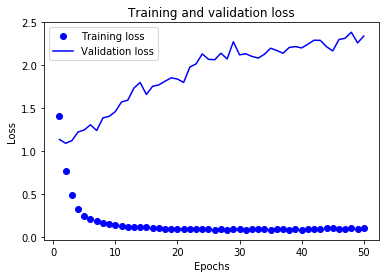

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt

Show an accuracy graph.

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\envs\\551\\lib\\site-packages\\matplotlib\\pyplot.py'>

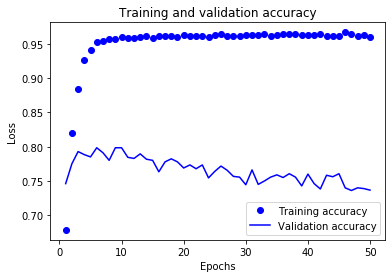

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt